# Visualizations

## Import data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## DETERMINES IF PLOTS WILL BE RENDERED
showPlots = True

full_df = pd.read_csv('full.csv')
man_df = pd.read_csv('man.csv')
wife_df = pd.read_csv('wife.csv')
husband_df = pd.read_csv('husband.csv')
long_df = pd.read_csv('long.csv')

nrows = 4
ncols = 3

features = ('spectral slope', 'spectral roll off', 'F0', 'pitch range', 'max_jump', 'jitter', 'shimmer', 'energy', 'max intensity', 'intensity', 'harmocity')
colors = {1:'green', 2:'orange', 3:'red'}

def plotDataFrame(dataframe, pdfname):
  '''
    Produces a line plot of the feature over the duration of the clip
    This is performed on each of the speakers
    Time points are colour coded by label
  '''
  fig, plots = plt.subplots(nrows, ncols, figsize = (25,20))

  featureIdx = -1

  for rowIdx in range(nrows):
    for colIdx in range(ncols):
      featureIdx += 1
      if featureIdx > 10:
        break
      feature = features[featureIdx]
      ax = plots[rowIdx][colIdx]
      temp_df = dataframe[dataframe[feature] != 0]
      y = temp_df[feature]
      x = temp_df['clip index']
      ax.plot(x, y, c = 'b')
      temp_df_talking = temp_df[temp_df['clean_label'] == 1]
      y = temp_df_talking[feature]
      x = temp_df_talking['clip index']
      ax.scatter(x, y, c = colors[1], label='talking')
      temp_df_yelling = temp_df[temp_df['clean_label'] == 2]
      y = temp_df_yelling[feature]
      x = temp_df_yelling['clip index']
      ax.scatter(x, y, c = colors[2], label='yelling')
      temp_df_screaming = temp_df[temp_df['clean_label'] == 3]
      y = temp_df_screaming[feature]
      x = temp_df_screaming['clip index']
      ax.scatter(x, y, c = colors[3], label='screaming')
      ax.legend()

      ax.set_title(f'Combined voices {feature} over time')

  fig.tight_layout(pad=3.0)
  fig.savefig(pdfname)

def barPlotDataframes(dataframe, dataframeName, pdfname, showPlot = False):
  '''
    Produces a bar plot for each feature in counts of three bins
    @TODO increase bins with more data
    The bars are separated and colour coded by label
  '''
  fig, plots = plt.subplots(nrows, ncols, figsize = (25,20))
  featureIdx = -1
  for rowIdx in range(nrows):
    for colIdx in range(ncols):
      featureIdx += 1
      if featureIdx > 10:
        break
      feature = features[featureIdx]
      temp_df = dataframe[dataframe[feature] != 0]
      temp_df[f'binned_{feature}'] = pd.qcut(temp_df[feature], q=3)
      temp_df_talking = temp_df[temp_df['clean_label'] == 1]
      temp_df_yelling = temp_df[temp_df['clean_label'] == 2]
      temp_df_screaming = temp_df[temp_df['clean_label'] == 3]

      ind = np.arange(3)  # the x locations for the groups
      width = 0.25      # the width of the bars

      cats = []
      counts_talking = []
      for idx,name in enumerate(temp_df_talking[f'binned_{feature}'].value_counts(normalize = True).index.tolist()):
        cats.append(name)
        counts_talking.append(temp_df_talking[f'binned_{feature}'].value_counts()[idx])

      counts_yelling = []
      for idx,name in enumerate(temp_df_yelling[f'binned_{feature}'].value_counts(normalize = True).index.tolist()):
        counts_yelling.append(temp_df_yelling[f'binned_{feature}'].value_counts()[idx])
      
      cats_screaming = []
      counts_screaming = []
      for idx,name in enumerate(temp_df_screaming[f'binned_{feature}'].value_counts(normalize = True).index.tolist()):
        counts_screaming.append(temp_df_screaming[f'binned_{feature}'].value_counts()[idx])

      # fig, ax = plt.subplots(figsize = (20, 10))

      ax = plots[rowIdx][colIdx]

      rects1 = ax.bar(ind, counts_talking,
                      width,
                      color = 'g')
      rects2 = ax.bar(ind + width, counts_yelling,
                      width,
                      color = 'orange')
      rects3 = ax.bar(ind + width + width, counts_screaming,
                      width,
                      color = 'red')

      # add some text for labels, title and axes ticks
      ax.set_ylabel('counts')
      ax.set_xticks(ind + width / 2)
      ax.set_title(f'Counts of binned {feature} for {dataframeName}')
      ax.set_xticklabels(cats)
      
      ax.legend((rects1[0], rects2[0], rects3[0]), ('Talking', 'Yelling', 'Screaming'), fontsize=14)

  if showPlot:
    plt.show()

  fig.savefig(pdfname)

## Plot features over time

In [ ]:
plotDataFrame(full_df, 'plot-scatter-full.pdf')

In [ ]:
plotDataFrame(man_df, 'plot-scatter-man.pdf')

In [ ]:
plotDataFrame(wife_df, 'plot-scatter-wife.pdf')

In [ ]:
plotDataFrame(husband_df, 'plot-scatter-husband.pdf')

In [ ]:
plotDataFrame(long_df, 'plot-scatter-long.pdf')

## Binned bar plots

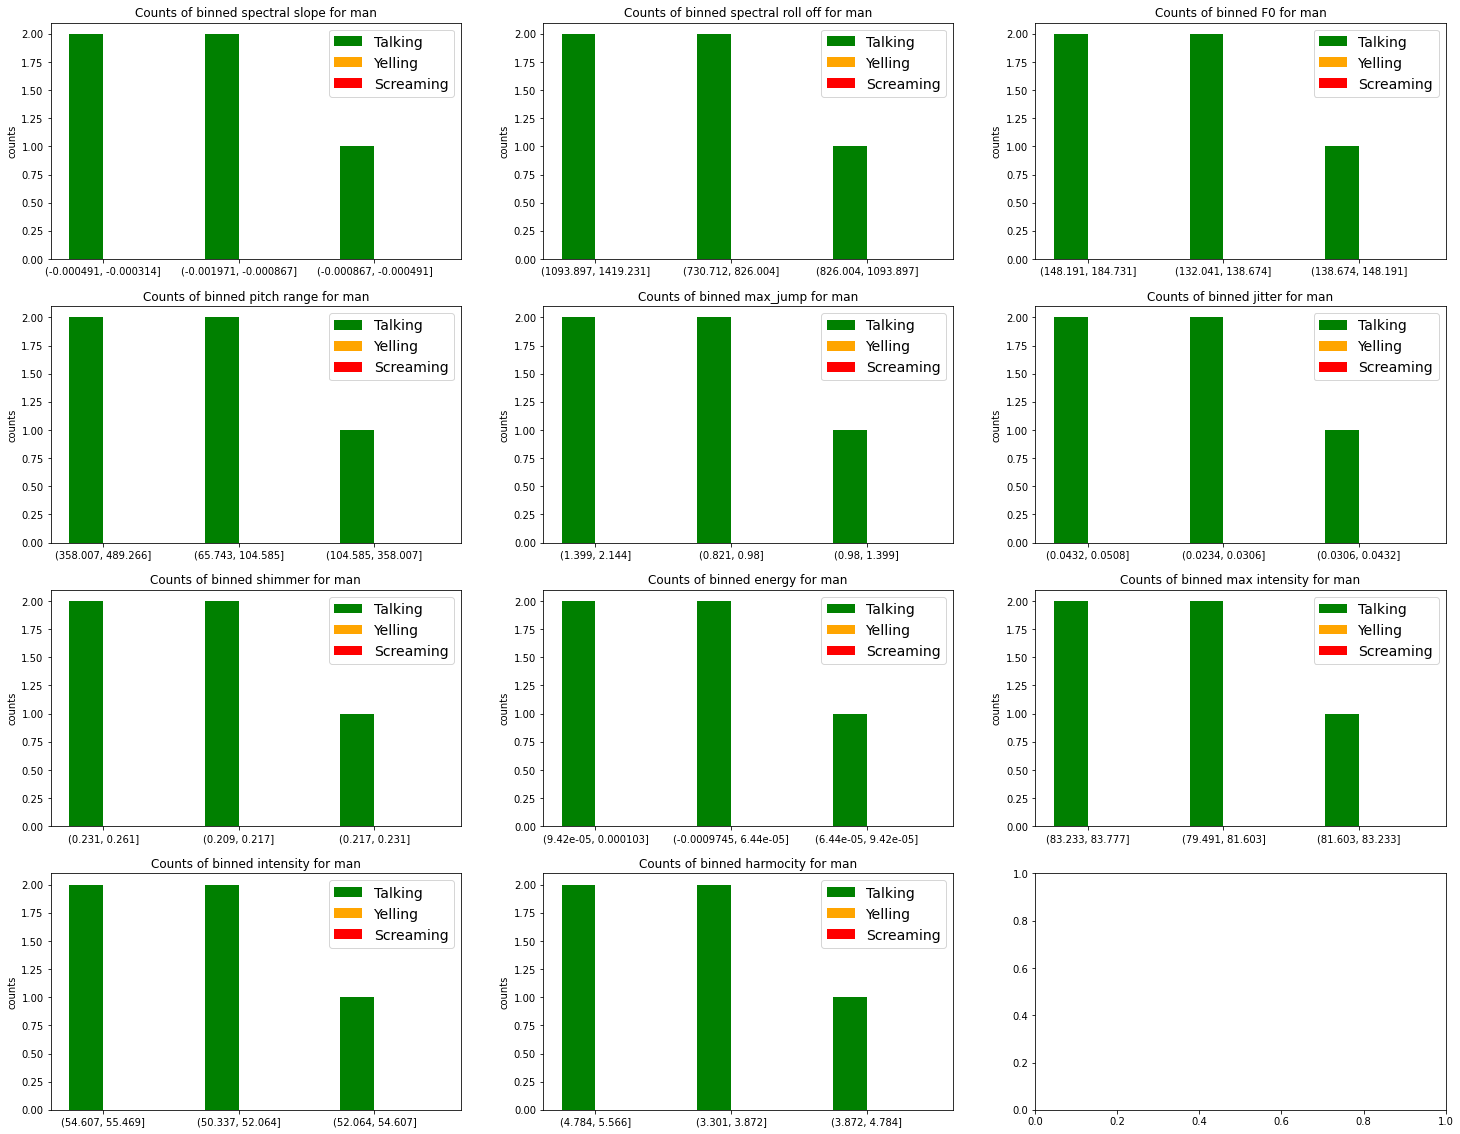

In [ ]:
barPlotDataframes(man_df, 'man', 'bar-man.pdf', showPlots)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

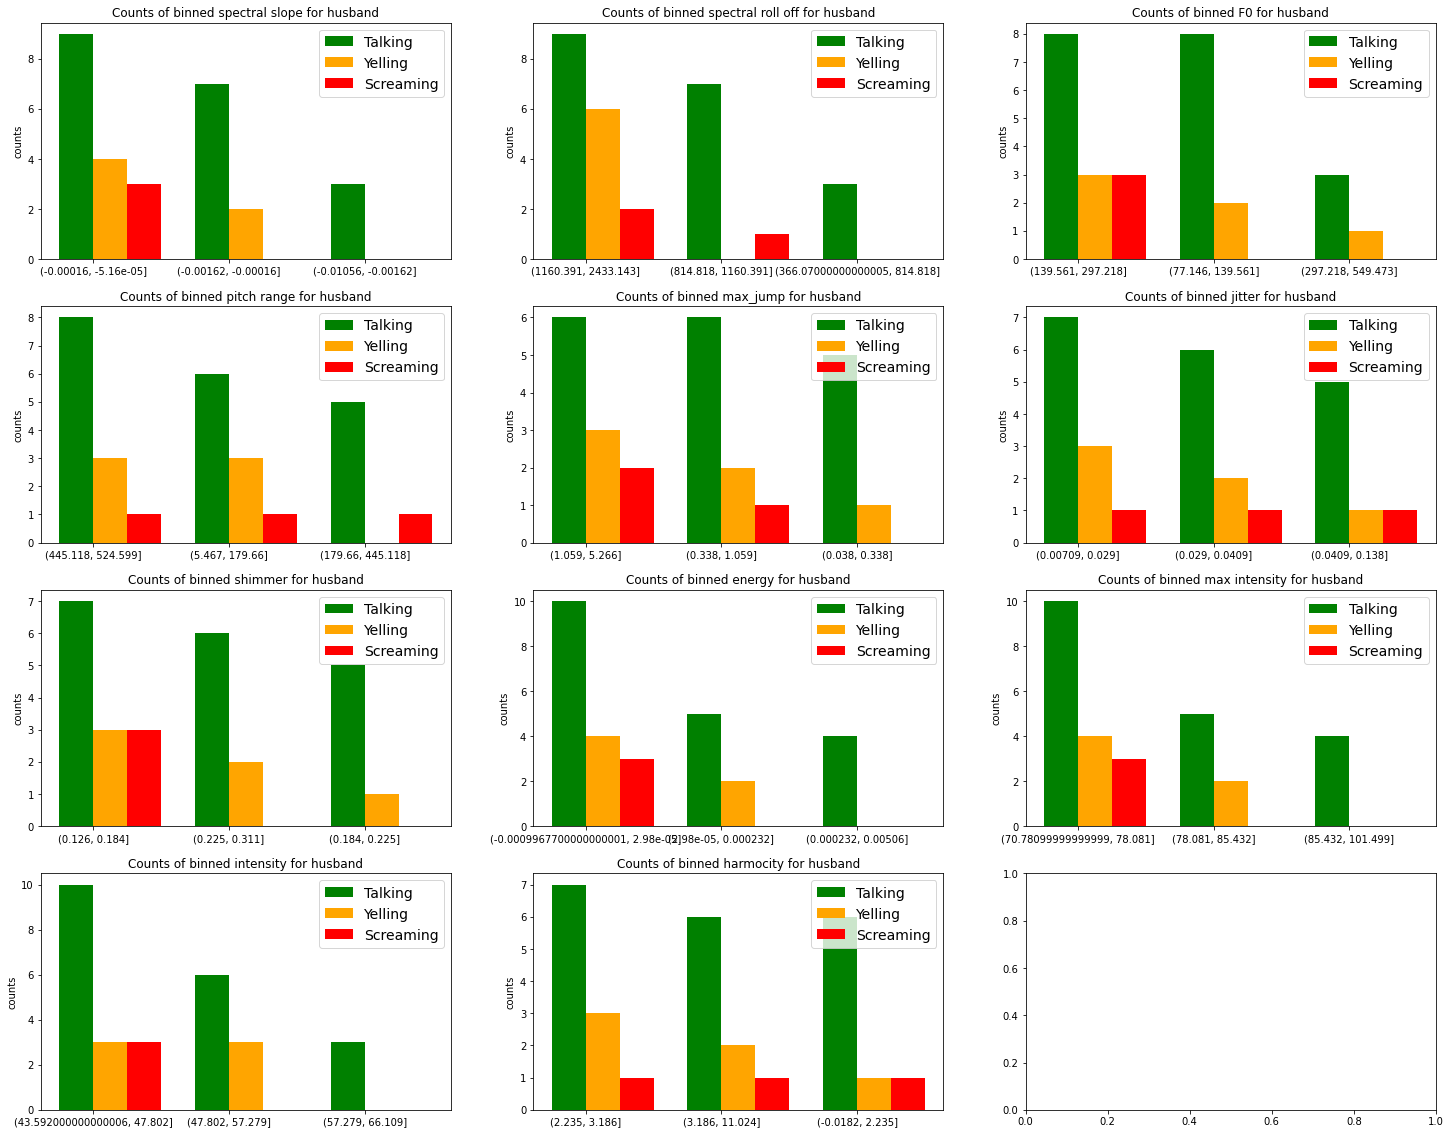

In [ ]:
barPlotDataframes(husband_df, 'husband', 'bar-husband.pdf', showPlots)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

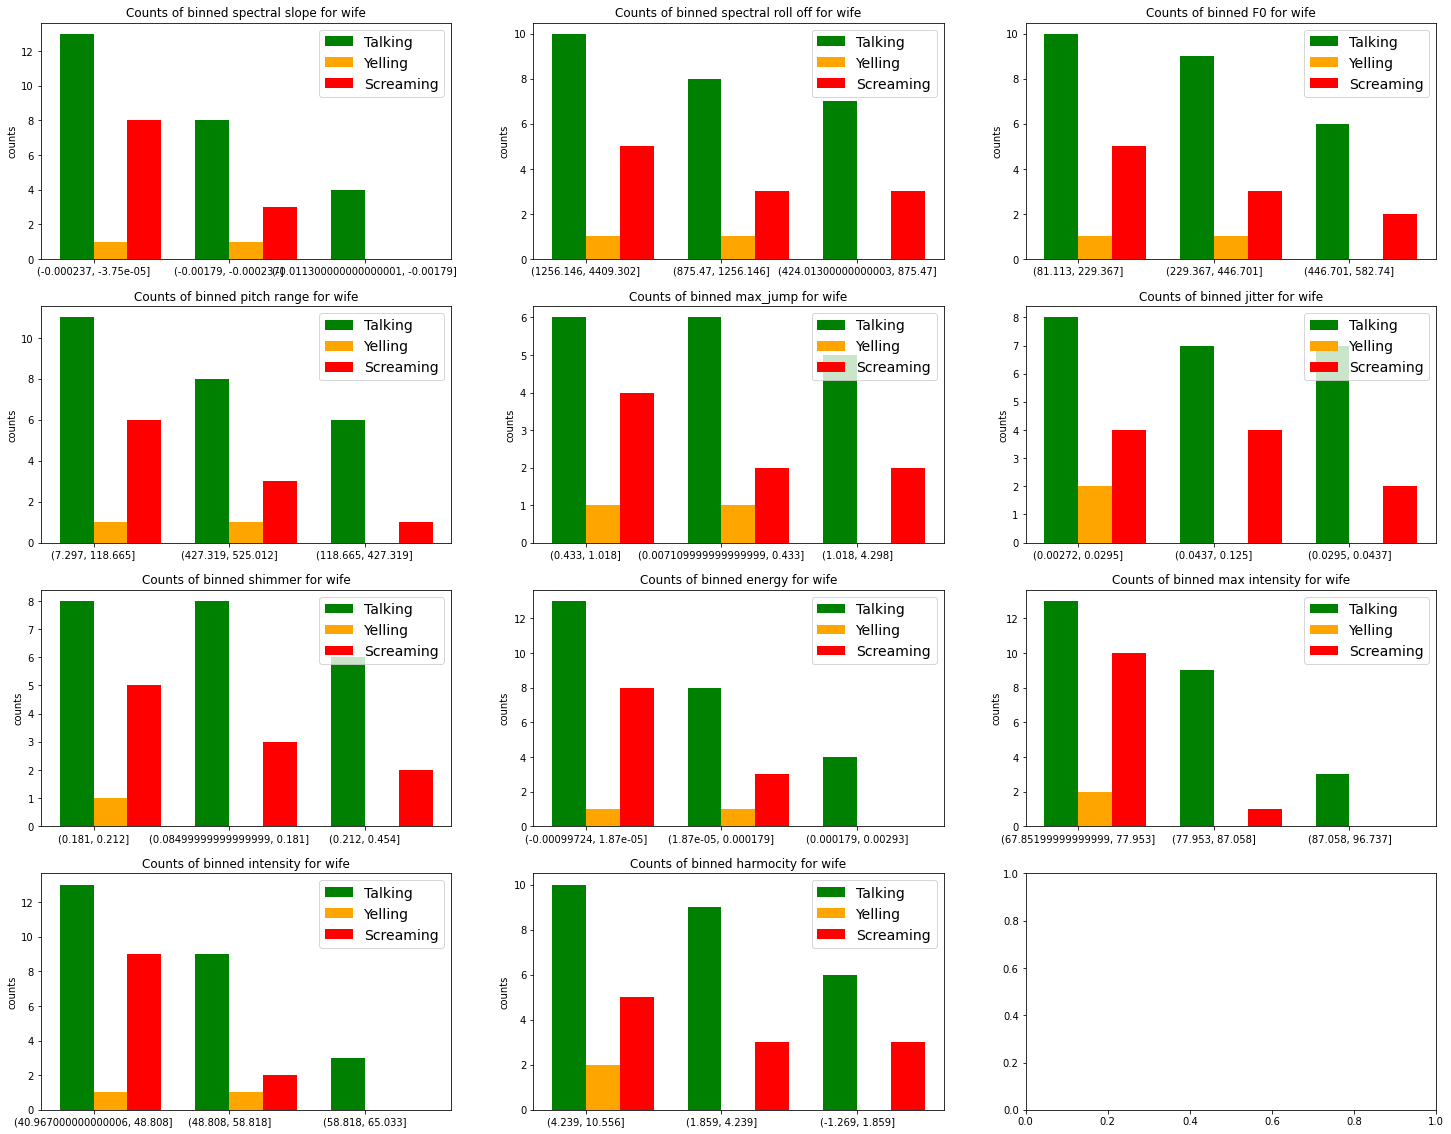

In [ ]:
barPlotDataframes(wife_df, 'wife', 'bar-wife.pdf', showPlots)

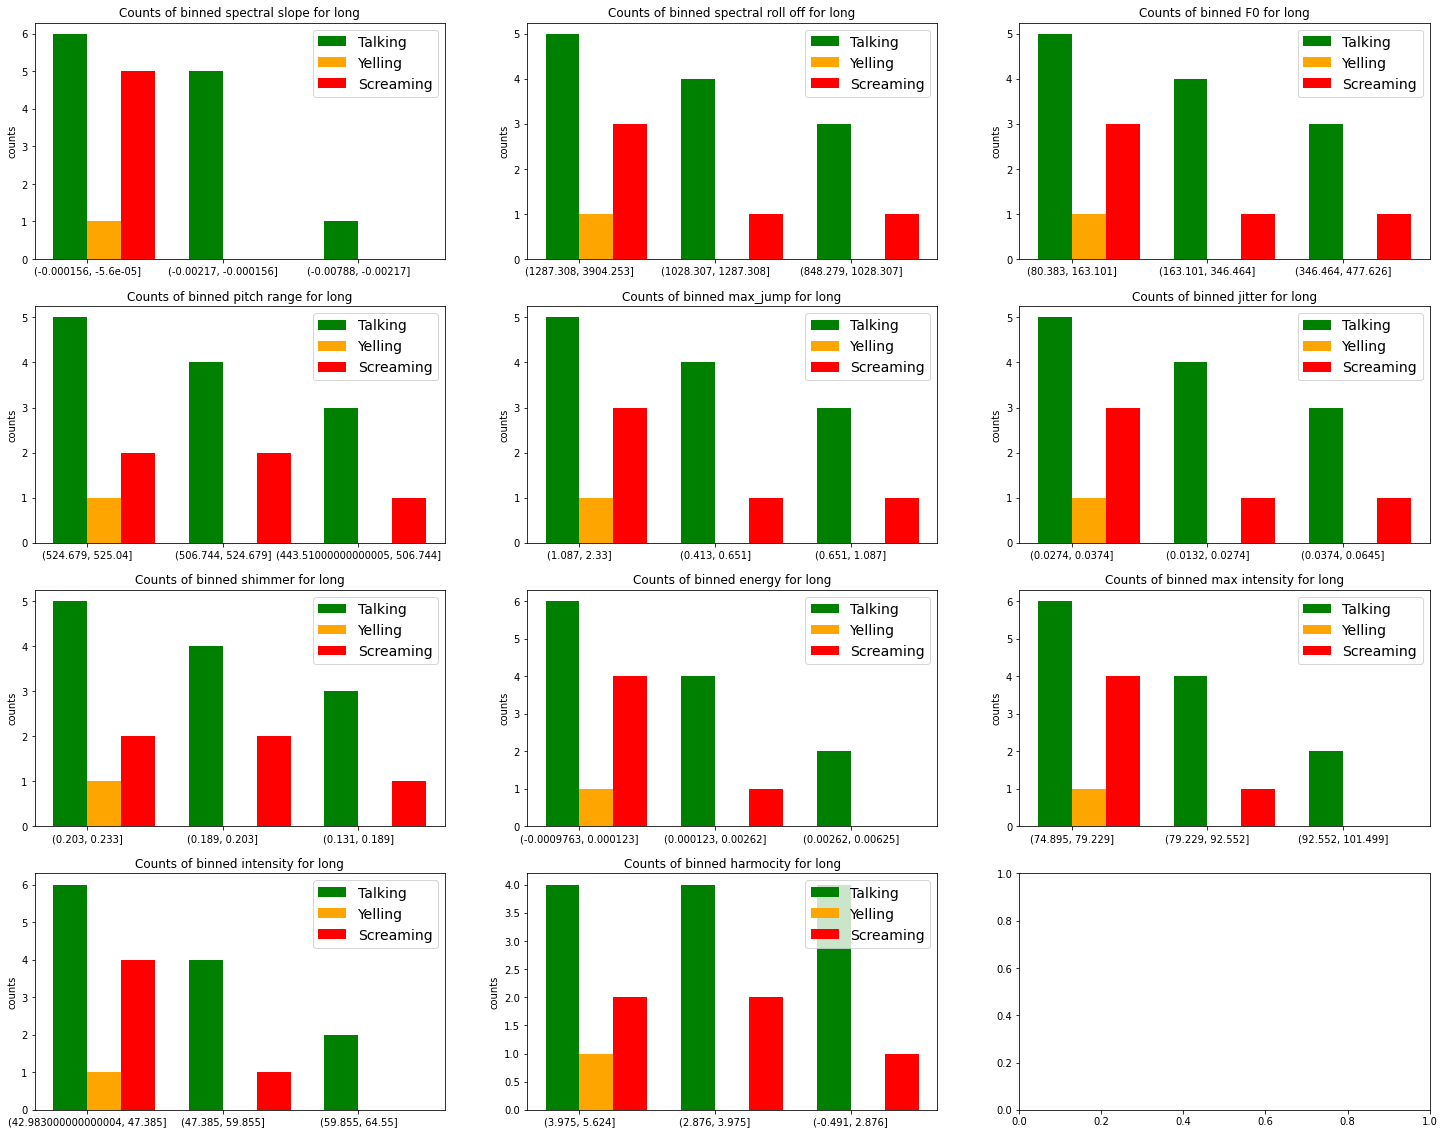

In [ ]:
barPlotDataframes(long_df, 'long','bar-long.pdf', showPlots)